## 5. How to Develop a Light Gradient Boosted Machine (LightGBM) Ensemble

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2021.10.06 </div>
<div style="text-align: right\"> Last update: 2021.10.06</div>

- 출처 : https://machinelearningmastery.com/light-gradient-boosted-machine-lightgbm-ensemble/

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

from scipy.signal import find_peaks

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

LightGBM extends the gradient boosting algorithm by adding a type of automatic feature selection as well as focusing on boosting examples with larger gradients. This can result in a dramatic speedup of training and improved predictive performance.

### Light Gradient Boosted Machine Algorithm

### LightGBM Scikit-Learn API

In [3]:
import lightgbm

In [4]:
lightgbm.__version__

'3.2.1'

lgbm 고유의 api가 있지만 여기서는 sklearn의 wrapper 클래스를 사용할 것이다. : LGBMRegressor, LGBMClassfier

#### LightGBM Ensemble for Classification

먼저 make_classification 함수를 사용하여 20개의 피처를 가지는 1000개 샘플을 만든다.

In [5]:
from sklearn.datasets import make_classification

In [6]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,  n_redundant=5, random_state=7)

In [7]:
print(X.shape, y.shape)

(1000, 20) (1000,)


여기서는 k-fold cv를 3번 반복하고 fold를 10개로 만들 것이다.

In [8]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier

In [9]:
model = LGBMClassifier()

In [10]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [11]:
cv

RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

In [12]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv , n_jobs=1)

In [13]:
n_scores

array([0.94, 0.89, 0.93, 0.97, 0.93, 0.94, 0.88, 0.95, 0.97, 0.9 , 0.94,
       0.94, 0.95, 0.93, 0.95, 0.97, 0.93, 0.96, 0.9 , 0.88, 0.95, 0.92,
       0.88, 0.92, 0.92, 0.96, 0.95, 0.89, 0.93, 0.94])

In [15]:
print(n_scores.mean(), n_scores.std())

0.9303333333333335 0.02701645589060282


전체 데이터로 최종 모델을 만드는 방법도 있다.

In [16]:
model = LGBMClassifier()
model.fit(X, y)

LGBMClassifier()

예측해보기

In [17]:
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,
       2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,
       0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,
       0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]

yhat = model.predict([row])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


#### LightGBM Ensemble for Regression

In [18]:
from sklearn.datasets import make_regression

In [19]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [20]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor

In [21]:
model = LGBMRegressor()

In [22]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

In [23]:
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -60.004 (2.887)


전체 데이터로 예측하기

In [24]:
model = LGBMRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,
       -0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,
       -1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,
       1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]

yhat = model.predict([row])
print('Prediction: %d' % yhat[0])

Prediction: 52


### LightGBM Hyperparameters

#### Explore Number of Trees

가장 중요한 hp중 하나가 앙상블에 사용할 tree의 수인 n_estimators이다.  
결정트리는 시퀀셜하게 연결된다. 예측 성능을 높이기 위해.  
디펄트 값은 100이다.  
아래 예제는 10 ~ 5000사이 변경을 가했을 때 결과를 비교한 것이다.

In [25]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    trees = [10, 50, 100, 500, 1000, 5000]
    for n in trees:
        models[str(n)] = LGBMClassifier(n_estimators=n)
    return models

In [39]:
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [40]:
X, y = get_dataset()

In [41]:
models = get_models()

In [42]:
models

{'10': LGBMClassifier(n_estimators=10),
 '50': LGBMClassifier(n_estimators=50),
 '100': LGBMClassifier(),
 '500': LGBMClassifier(n_estimators=500),
 '1000': LGBMClassifier(n_estimators=1000),
 '5000': LGBMClassifier(n_estimators=5000)}

In [43]:
models.items()

dict_items([('10', LGBMClassifier(n_estimators=10)), ('50', LGBMClassifier(n_estimators=50)), ('100', LGBMClassifier()), ('500', LGBMClassifier(n_estimators=500)), ('1000', LGBMClassifier(n_estimators=1000)), ('5000', LGBMClassifier(n_estimators=5000))])

In [44]:
results, names = list(), list()

In [45]:
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('[INFO] {} {} ({})'.format(name, mean(scores), std(scores) ))

[INFO] 10 0.8586666666666666 (0.03148897514298545)
[INFO] 50 0.9133333333333336 (0.027365834335698374)
[INFO] 100 0.9303333333333335 (0.02701645589060282)
[INFO] 500 0.9403333333333335 (0.026892791268706587)
[INFO] 1000 0.9406666666666667 (0.02780087928265737)
[INFO] 5000 0.9390000000000001 (0.026751946969644384)


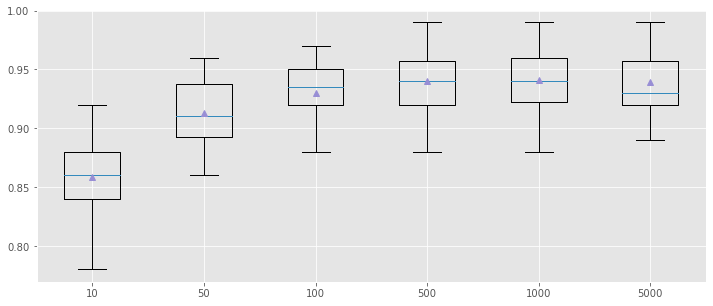

In [46]:
plt.figure(figsize = (12, 5))
plt.boxplot(results, labels = names, showmeans=True)
plt.show()

#### Explore Tree Depth

The tree depth controls how specialized each tree is to the training dataset: how general or overfit it might be. Trees are preferred that are not too shallow and general (like AdaBoost) and not too deep and specialized (like bootstrap aggregation).

Gradient boosting generally performs well with trees that have a modest depth, finding a balance between skill and generality.

Tree depth는 `max_depth`로 조절되는데 디펄트 값은 설정되지 않은 값이다. 
(the default mechanism for controlling how complex trees are is to use the number of leaf nodes.  )

tree의 복잡도를 조절하는 방법은 두가지가 있다.:  
the max depth of the trees and the maximum number of terminal nodes (leaves) in the tree. In this case, we are exploring the number of leaves so we need to increase the number of leaves to support deeper trees by setting the “num_leaves” argument.

아래는 tree depth를 1 ~ 10 범위로 조절한 예이다.

In [48]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1, 11):
        models[str(i)] = LGBMClassifier(max_depth = i, num_leaves = 2**i)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [49]:
X, y = get_dataset()
models = get_models()

In [50]:
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('[INFO] {} {} ({})'.format(name, mean(scores), std(scores) ))

[INFO] 1 0.8323333333333334 (0.028246927069840496)
[INFO] 2 0.8733333333333333 (0.030037014202850165)
[INFO] 3 0.8979999999999999 (0.03091924966748062)
[INFO] 4 0.9113333333333333 (0.0327346231925091)
[INFO] 5 0.9226666666666666 (0.028276413413931306)
[INFO] 6 0.9216666666666669 (0.02450623503428372)
[INFO] 7 0.9260000000000002 (0.030724582991474417)
[INFO] 8 0.9280000000000002 (0.027006172134038768)
[INFO] 9 0.9293333333333333 (0.03161574853701165)
[INFO] 10 0.9263333333333336 (0.02834117538533328)


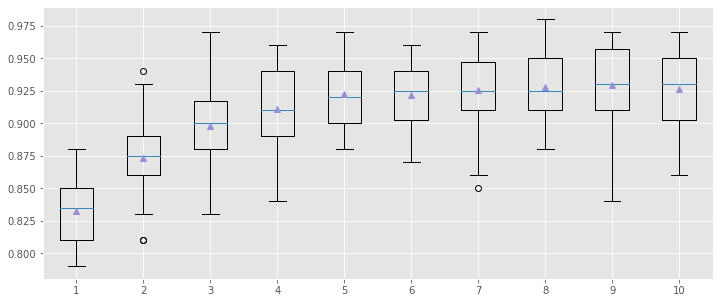

In [51]:
plt.figure(figsize = (12, 5))
plt.boxplot(results, labels = names, showmeans=True)
plt.show()

- 모델 성능은 depth가 커질수록 향상되다가 어느정도 깊어지면 일정성능이 유지되는 것을 알 수 있다.

#### Explore Learning Rate

default 값은 0.1이다.

In [52]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = LGBMClassifier(learning_rate=r)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [53]:
X, y = get_dataset()
models = get_models()

In [54]:
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('[INFO] {} {} ({})'.format(name, mean(scores), std(scores) ))

[INFO] 0.0001 0.8003333333333333 (0.03798976470343323)
[INFO] 0.0010 0.8110000000000002 (0.035057096285916196)
[INFO] 0.0100 0.8586666666666666 (0.03461534662865912)
[INFO] 0.1000 0.9303333333333335 (0.02701645589060282)
[INFO] 1.0000 0.9293333333333333 (0.03021405118299908)


- 여기서는 큰 값이 성능이 우수한 것으로 나왔다. **learning rate를 줄이고 트리의 갯수를 늘리면 성능을 더 높일 수 있을 것이라 예상할 수 있을 것이다.**

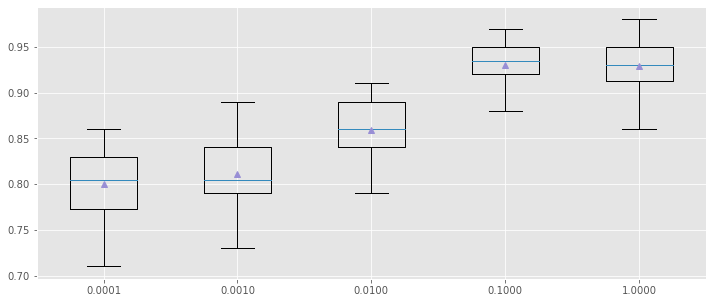

In [55]:
plt.figure(figsize = (12, 5))
plt.boxplot(results, labels = names, showmeans=True)
plt.show()

#### Explore Boosting Type   
lgbm은 다양한 타입의 부스팅 알고리즘을 제공한다.  `boosting_type`에 설정하면 되며 default 값은 `gbdt`이다.  
설정할 수 있는 스트링 타입은 다음과 같다.  
- `gbdt`: Gradient Boosting Decision Tree (GDBT).
- `dart`: Dropouts meet Multiple Additive Regression Trees (DART).
- `goss`: Gradient-based One-Side Sampling (GOSS).

In [56]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
    types = ['gbdt', 'dart', 'goss']
    for t in types:
        models[t] = LGBMClassifier(boosting_type=t)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [57]:
X, y = get_dataset()
models = get_models()

In [58]:
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('[INFO] {} {} ({})'.format(name, mean(scores), std(scores) ))

[INFO] gbdt 0.9303333333333335 (0.02701645589060282)
[INFO] dart 0.9143333333333334 (0.028946310453819294)
[INFO] goss 0.9176666666666667 (0.027890659527678583)


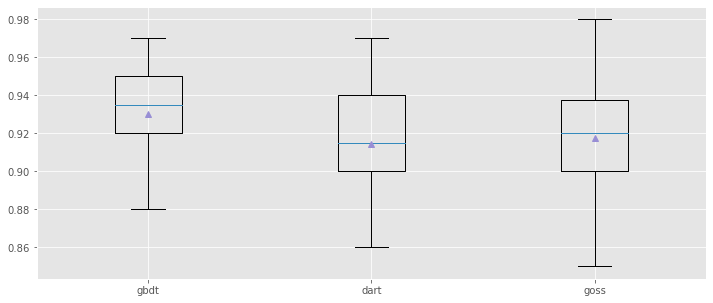

In [59]:
plt.figure(figsize = (12, 5))
plt.boxplot(results, labels = names, showmeans=True)
plt.show()